In [1]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import json
import string
# from mei import Size_Distribution_Optics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from xhistogram.xarray import histogram
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [4]:
import glob
import dask.dataframe as dd

In [5]:
def normalize(df):
    return (df - df.mean()) / df.std()

def normalize1(df):    
    mx = df.max()
    mn = df.min()    
    new = (df - mn) / (mx - mn)    
    return new

def g_transform(df):
    qt = QuantileTransformer(
        n_quantiles=500, output_distribution="normal", random_state=0
    )
    #dff = np.reshape(df.Asy.values, (df.Asym.size, 1))
    return qt.fit_transform(df)

In [6]:
columns = ['Extinction', 'Scattering', 'SSA', 'Asym', 'coating', 'core_dia', 'n_core', 'k_core', 'n_shell', 'k_shell', 'density', 'lambda']
out = ['Extinction', 'Scattering', 'SSA', 'Asym']
#df1 = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_x1.csv', index_col=0).sort_index().sort_index().iloc[:-1224, :]
#df2 = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_x2.csv', index_col=0).sort_index().sort_index().iloc[:-1224, :]
#df = pd.concat([df1, df2], axis=0).reset_index()
#df = df[columns].dropna().astype('float')
#df['x'] = np.pi * df['core_dia'] / df['lambda']
#df

In [7]:
df = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_all.csv', index_col=0).sort_index()
df = df[columns].dropna().astype('float').drop_duplicates()
df['x'] = np.pi * df['core_dia'] / df['lambda']
# df[out] = g_transform(df[out])

In [8]:
df1 = df.copy()
df1[out] = g_transform(df[out])

In [9]:
df1

,Extinction,Scattering,SSA,Asym,coating,core_dia,n_core,k_core,n_shell,k_shell,density,lambda,x
0,-0.327618,-0.433759,-0.487577,-0.454943,0.0,10.0,1.48600,0.106100,1.464000,2.630000e-07,2.6,100.0,0.314159
2,-0.476549,-0.617239,-0.642495,-0.648539,0.0,10.0,1.48600,0.106100,1.396000,1.100000e-07,2.6,200.0,0.157080
8,-0.826537,-0.705554,-0.661125,-0.721034,0.0,10.0,1.46300,0.035900,1.349000,1.600000e-08,2.6,300.0,0.104720
11,-1.169010,-0.803021,-0.724936,-0.827067,0.0,10.0,1.45504,0.023075,1.336727,1.353750e-09,2.6,450.0,0.069813
11,-1.169010,-0.803021,-0.724936,-0.827067,0.0,10.0,1.45504,0.023075,1.336727,1.353750e-09,2.6,450.0,0.069813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44527776,0.010516,-0.100750,-0.324867,-0.170515,0.4,10000.0,1.61350,0.648098,2.017500,7.225000e-01,1.7,75000.0,0.418879
44527837,0.044098,-0.057998,-0.267225,-0.114775,0.4,11000.0,1.61350,0.648098,2.015000,7.250000e-01,1.7,70000.0,0.493679
44527839,0.017405,-0.092749,-0.314788,-0.158915,0.4,11000.0,1.61350,0.648098,2.020000,7.200000e-01,1.7,80000.0,0.431969
44527902,0.007508,-0.102011,-0.324077,-0.169223,0.4,12000.0,1.61350,0.648098,2.020000,6.850000e-01,1.7,90000.0,0.418879


In [13]:
names = ['$Q_{ext}$', '$Q_{sca}$', '$\omega$', 'g']

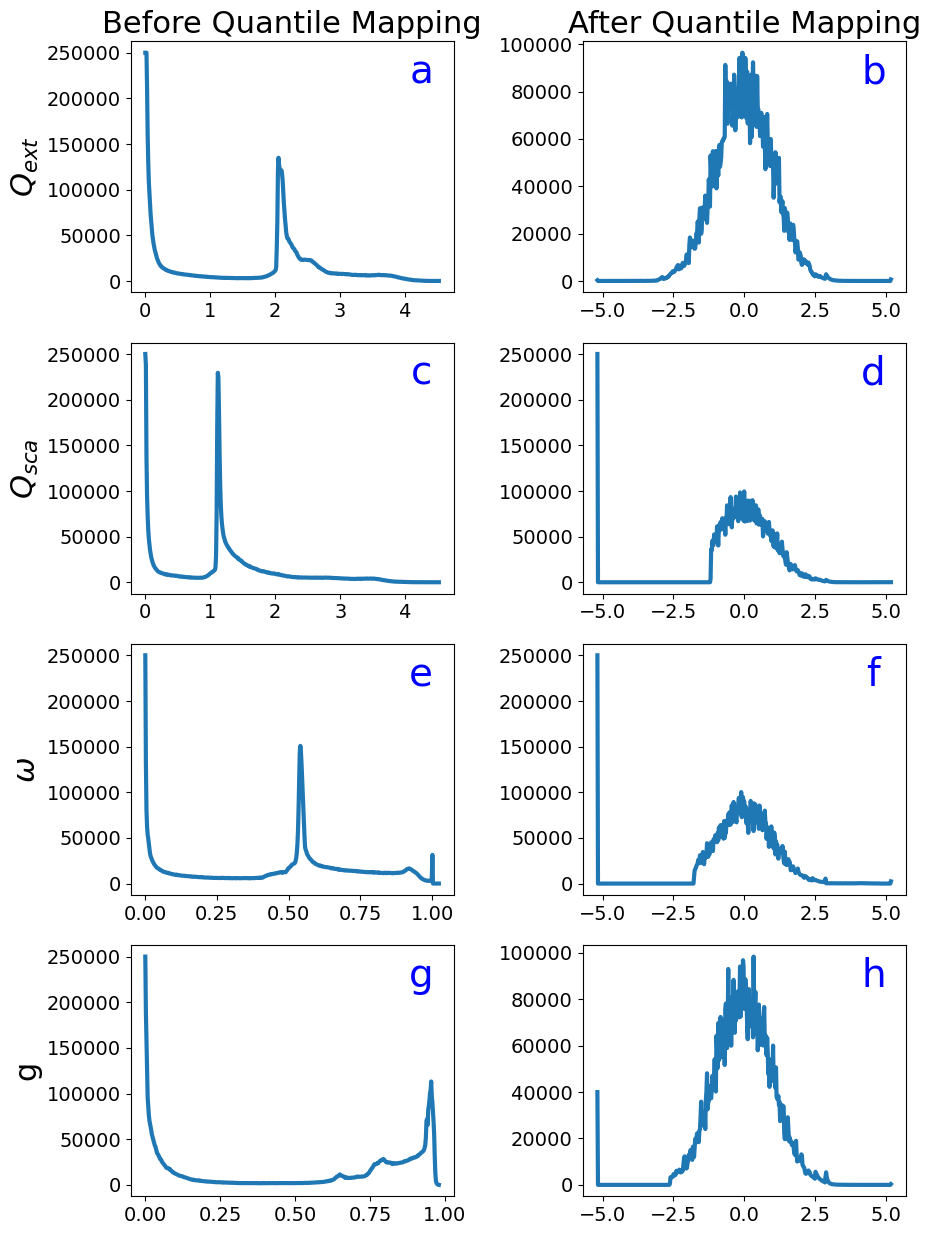

In [30]:
fs = 22
alps = list(string.ascii_lowercase)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
# axes = axes.flatten()
for i, (col, name) in enumerate(zip(out, names)):
    bin1 = np.linspace(df[col].min(), df[col].max(), 500)
    bin2 = np.linspace(df1[col].min(), df1[col].max(), 500)
    
    h1 = histogram(df[col].to_xarray(), bins=[bin1])
    h2 = histogram(df1[col].to_xarray(), bins=[bin2])
    for h in [h1, h2]:
        h[h>2.5e5] = 2.5e5
    h1.plot(ax=axes[i, 0], lw=3)          
    h2.plot(ax=axes[i, 1], lw=3) 
    for ax in [axes[i, 0], axes[i, 1]]:
        ax.set_xlabel('')
        ax.set_ylabel('')        
    # axes[i, 0].set_ylabel(col, fontsize=fs)
    axes[i, 0].set_ylabel(name, fontsize=fs)
    
for ax, alp in zip(axes.flatten(),alps):
    ax.tick_params(labelsize=fs-8)
    ax.text(0.9, 0.8, '%s'%alp, transform=ax.transAxes, va='bottom', ha='center', fontsize=fs+6, color='blue')
    
axes[0, 0].set_title('Before Quantile Mapping', fontsize=fs) 
axes[0, 1].set_title('After Quantile Mapping', fontsize=fs) 
plt.subplots_adjust(wspace=0.4)
plt.savefig('./figs/mapping.png', bbox_inches='tight', dpi=300)
plt.show()